#Blatt 03 Aufgabe 4

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

Umwandeln der Farbilder in Graubilder

In [53]:
img1=imread("./suchbilder/bild1.png",as_gray=True)
img2=imread("./suchbilder/bild2.png",as_gray=True)





#Aufg 4.1
Ermittelt Veränderung. Mithilfe eines arithmetischen Operator.

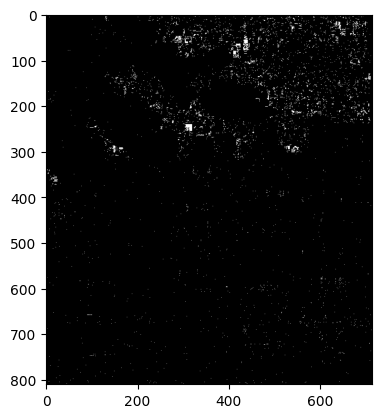

In [54]:
#1.Lösungsweg
#diff=1-np.isclose(img1,img2,atol=0)
diff=np.isclose(img1,img2,atol=0)
plt.imshow(diff,cmap='gray')

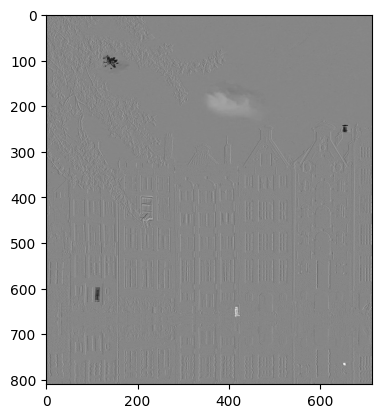

In [57]:
#2.Lösungsweg
plt.imshow((img1-img2),cmap="gray")
